In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [14.00, 6]

### Data collection and preparation

As a first step the data is read as a dataframe and dates of the dataset are transformed into a proper date format.
To get an first overview about the dataset, the first two rows are shown. As a next step, the dataset is described and a brief statistical analysis is performed. 
The describe function gives an overview of key descriptive statistics & the info function gives an overview about the column names, data types and NaN.

In [4]:
CHARGE_SET_PATH = "charging_sessions.csv"
WEATHER_SET_PATH = "weather_burbank_airport.csv"

charg_set = pd.read_csv(CHARGE_SET_PATH, parse_dates=["connectionTime", "disconnectTime", "doneChargingTime"])
weather_set = pd.read_csv(WEATHER_SET_PATH, parse_dates=["timestamp"])

#### Charging set

In [5]:
charg_set

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


In [6]:
charg_set.describe()

,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


Out of the numeric variables above, only few can be analyzed numerically:
- `Unnamed: 0` is just a row identifier, a byproduct of the import process and provides no aditional value.  
    -  Looking at the statistics, these values are not unique. This is most probably due to this dataset being a concatenation of multiple datasets (e.g. for different time ranges and sites).
- `siteID` is a categorical variable, with two possible values: `1` and `2`
- `userID` is an identifier that can be used to correlate multiple charging session by the same user
- `kWhDelivered` is the only one that can be numerically analyzed
    - Assuming the average electric vehicle battery capacity of 40 kWh ([Source](https://www.eonenergy.com/electric-vehicle-charging/running-costs-and-benefits/battery-capacity-and-lifespan.html)), majority of the charging sessions seem to be top-ups and not full charges.

In [7]:
charg_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Unnamed: 0        66450 non-null  int64              
 1   id                66450 non-null  object             
 2   connectionTime    66450 non-null  datetime64[ns, UTC]
 3   disconnectTime    66450 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered      66450 non-null  float64            
 6   sessionID         66450 non-null  object             
 7   siteID            66450 non-null  int64              
 8   spaceID           66450 non-null  object             
 9   stationID         66450 non-null  object             
 10  timezone          66450 non-null  object             
 11  userID            49187 non-null  float64            
 12  userInputs        49187 non-null  object             
dtypes

Taking a look at the statistics, we can observe a few patterns:
- There is more than 400 entries with the null value for `doneChargingTime`. These are most probably vehicles that were still charging at the time of creation of this dataset
- `userID` and `userInputs` have the same number of missing entries, which is to be expected, since they should both be null (or non-null) at the same time. We can check later if this is indeed the case 

#### Weather set

In [8]:
weather_set

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [9]:
weather_set.describe()

,timestamp,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29244,29219.000000,29224.000000,29236.000000,29158.000000,29244.000000,29218.000000
mean,2019-06-29 23:51:42.252770048,17.885622,30.107993,986.879400,8.566568,0.059360,17.731433
min,2018-01-01 08:53:00,2.000000,4.000000,971.000000,0.000000,0.000000,0.000000
25%,2018-10-06 05:38:00,13.000000,26.000000,984.500000,6.000000,0.000000,13.000000
50%,2019-06-24 00:23:00,17.000000,33.000000,986.480000,7.000000,0.000000,17.000000
75%,2020-03-25 20:08:00,22.000000,34.000000,989.110000,13.000000,0.000000,22.000000
max,2021-01-01 07:53:00,46.000000,47.000000,999.650000,57.000000,18.540000,42.000000
std,NaN,6.454604,5.400388,3.607065,6.699889,0.471682,6.321100


Observations:
- `timestamp` column tells us that the date range of the dataset is between `2018-01-01` and `2021-01-01`. This should be checked with the charging set for overlaps
- `temperature` and `precipitation` are consistent with dry weather that Burbank, California is known for

In [10]:
weather_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     29244 non-null  object        
 1   timestamp                29244 non-null  datetime64[ns]
 2   temperature              29219 non-null  float64       
 3   cloud_cover              29224 non-null  float64       
 4   cloud_cover_description  29224 non-null  object        
 5   pressure                 29236 non-null  float64       
 6   windspeed                29158 non-null  float64       
 7   precipitation            29244 non-null  float64       
 8   felt_temperature         29218 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


Observations:
- categorical attributes of `cloud_cover_description` have to be tranformed to boolean representations
- there are several values that are null. In case that these are non-consecutive, and relying on the fact that weather doesn't change suddenly, we can use the value of the measurement before or after to fill in the missing ones

In [99]:
weather_set["cloud_cover_description"].value_counts()

cloud_cover_description
Fair                       17122
Cloudy                      4936
Partly Cloudy               2668
Mostly Cloudy               1830
Light Rain                   896
Haze                         579
Smoke                        329
Fog                          325
Rain                         247
Heavy Rain                   120
Fair / Windy                  74
T-Storm                       18
Thunder in the Vicinity       17
Partly Cloudy / Windy         14
Light Rain / Windy            10
Mostly Cloudy / Windy         10
Cloudy / Windy                 9
Heavy Rain / Windy             7
Blowing Dust                   5
Heavy T-Storm                  4
Rain / Windy                   2
Thunder                        1
Light Rain with Thunder        1
Name: count, dtype: int64

In [100]:
pd.get_dummies(weather_set["cloud_cover_description"])

,Blowing Dust,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,...,Mostly Cloudy,Mostly Cloudy / Windy,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Smoke,T-Storm,Thunder,Thunder in the Vicinity
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29239,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29240,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29241,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29242,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Enriching the data

Since we are given timestamps of charging-relevant events, we can calculate the average connection and charging times. 
We will assume that the time the charging started is the time the connection is made.

In [12]:
charg_set["connectionDuration"] = charg_set["disconnectTime"] - charg_set["connectionTime"]
charg_set["chargingDuration"] = charg_set["doneChargingTime"] - charg_set["connectionTime"]
charg_set["idleDuration"] = charg_set["connectionDuration"] - charg_set["chargingDuration"]

In [15]:
charg_set[["connectionDuration", "chargingDuration", "idleDuration"]].describe()

,connectionDuration,chargingDuration,idleDuration
count,66450,62362,62362
mean,0 days 06:17:34.578209179,0 days 03:32:28.611109329,0 days 02:51:11.421795324
std,0 days 04:51:41.391314114,0 days 03:03:19.652032849,0 days 03:59:22.230088509
min,0 days 00:02:04,-1 days +23:18:38,-1 days +23:00:04
25%,0 days 02:51:57.750000,0 days 01:38:02,0 days 00:00:14
50%,0 days 06:11:44,0 days 02:47:01.500000,0 days 01:36:48.500000
75%,0 days 09:13:31.500000,0 days 04:44:41.750000,0 days 04:55:38
max,10 days 05:16:09,8 days 08:00:57,6 days 12:07:17


Based on the average connection and charging times, we can see a few trends:
- Majority (75%) of the connections are less then 9 hours long, which could correspond to the working hours
- 35-40% of the time connection time is spent idling (not charging)
- Some charging and idle durations are negative. Seeing that it's often around -1 hour, this could imply daylight savings time mismatches or something similar

Let's take a look at utilization, defined as:

$$utilization := \frac{charging \: time}{connection \: time} $$

in more detail.


In [17]:
charg_set["utilization"] = charg_set["chargingDuration"] / charg_set["connectionDuration"]
charg_set["utilization"].describe()

count    62362.000000
mean         0.647598
std          0.313831
min         -2.210151
25%          0.364974
50%          0.666440
75%          0.996550
max          1.792245
Name: utilization, dtype: float64

As observed in the previous section, the mean utilization is indeed 65%. Given that the value of `utilization` should be in the `[0, 1]` interval, some values, like those described as minimum and maximum, seem to be outliers, and might need to be removed.

Let's take a look at utilization in greater detail, and especially at those where utilization is greater than 1.

,Unnamed: 0,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,idleDuration,utilization,connectionDay,connectionMonth,connectionHour,disconnectHour
count,4692.000000,4692.000000,4692.000000,3631.000000,4692,4692,4692,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000
mean,5089.696718,14.449495,1.251492,1430.036629,0 days 04:20:23.429667519,0 days 04:21:18.999147485,-1 days +23:59:04.430520035,1.007760,3.162404,7.163257,11.402600,15.128730
std,3479.088497,12.638064,0.433917,1489.562601,0 days 03:59:39.261617252,0 days 03:59:37.942108123,0 days 00:01:13.858741502,0.018377,1.653549,3.289971,4.229115,3.582872
min,0.000000,0.508000,1.000000,22.000000,0 days 00:04:02,0 days 00:04:13,-1 days +23:00:04,1.000046,1.000000,1.000000,0.000000,0.000000
25%,1953.000000,5.530000,1.000000,410.000000,0 days 01:49:44,0 days 01:50:45,-1 days +23:59:01,1.002337,2.000000,5.000000,7.000000,13.000000
50%,4725.500000,11.318000,1.000000,828.000000,0 days 03:26:26,0 days 03:27:23,-1 days +23:59:02,1.004260,3.000000,8.000000,12.000000,16.000000
75%,7932.500000,19.588000,2.000000,2050.000000,0 days 05:54:26,0 days 05:55:24.500000,-1 days +23:59:03,1.008275,4.000000,10.000000,15.000000,17.000000
max,15135.000000,108.797242,2.000000,17097.000000,6 days 06:12:59,6 days 06:13:58,-1 days +23:59:59,1.792245,7.000000,12.000000,23.000000,23.000000


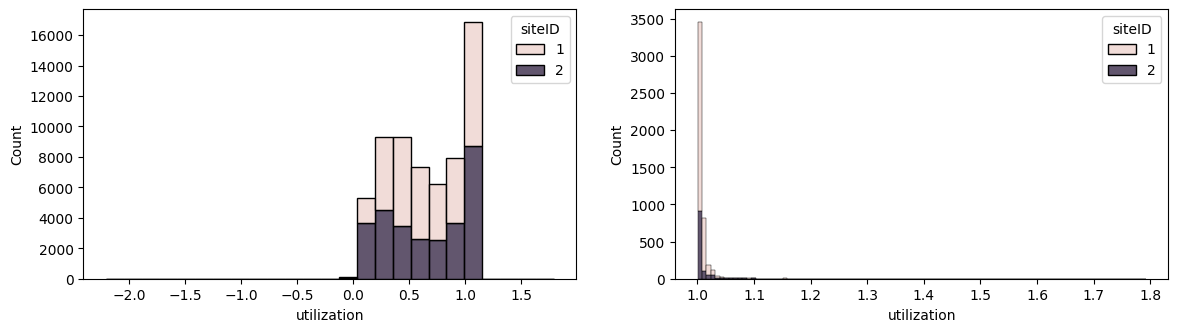

In [71]:
charge_utilization_above_1 = charg_set[1 < charg_set["utilization"]]

plt.rcParams["figure.figsize"] = [14.00, 3.5]
fig, axis = plt.subplots(1,2)
sns.histplot(charg_set, x="utilization", hue="siteID", multiple="stack", bins=25, ax=axis[0])
sns.histplot(charge_utilization_above_1, x="utilization", hue="siteID", multiple="stack", bins=100, ax=axis[1])

charge_utilization_above_1.describe()

We see a significant number of charges where utilization is 100% - these are most likely the ones where the electric vehicle was unplugged before it charged completely. 

There is around 4700 observations where utilization is greater then 1, but since the value is very close to 1, we can treat them as measurement errors.


In [91]:
charg_set.groupby("siteID").agg(avg = pd.NamedAgg(column="kWhDelivered", aggfunc='mean'))

,avg
siteID,
1,14.063156
2,9.249425


In [ ]:
charg_set.groupby("siteID").describe()

In [107]:
charg_set[charg_set["utilization"] < 0].describe()

,Unnamed: 0,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,utilization
count,27.000000,27.000000,27.000000,6.000000,27,27,27.000000
mean,7871.481481,2.479419,1.962963,889.500000,0 days 08:55:52.222222222,-1 days +23:55:03.370370371,-0.186907
std,4599.043374,3.555755,0.192450,421.951538,0 days 14:04:59.951537174,0 days 00:11:47.666867962,0.583318
min,492.000000,0.521000,1.000000,483.000000,0 days 00:18:43,-1 days +23:18:38,-2.210151
25%,3395.000000,0.815942,2.000000,527.000000,0 days 03:35:54,-1 days +23:59:00,-0.004516
50%,9082.000000,1.067230,2.000000,857.000000,0 days 05:22:24,-1 days +23:59:01,-0.002939
75%,11650.000000,1.707816,2.000000,1154.000000,0 days 07:17:57.500000,-1 days +23:59:02.500000,-0.001970
max,13406.000000,14.967000,2.000000,1470.000000,2 days 22:59:52,-1 days +23:59:59,-0.000051


Assumption: negative utilization is due to time changes

Since the UserID and userInputs have valid charging data, even though they have missing values, the entries will be kept in the dataset.

In [108]:
[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]

[{'WhPerMile': 400,
  'kWhRequested': 8.0,
  'milesRequested': 20,
  'minutesAvailable': 65,
  'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT',
  'userID': 1117},
 {'WhPerMile': 400,
  'kWhRequested': 8.0,
  'milesRequested': 20,
  'minutesAvailable': 65,
  'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT',
  'userID': 1117}]

### Descriptive Analytics

####  Temporal patterns and seasonality

Let's extract the day of the week, month and hour of the day from the connection time, to see the distribution of connections. Since the hour information is sensitive to the timezone, let's first convert it to the local time (America/Los_Angeles)

In [63]:
charg_set["localConnectionTime"] = charg_set["connectionTime"].dt.tz_convert("America/Los_Angeles")
charg_set["localDisconnectTime"] = charg_set["disconnectTime"].dt.tz_convert("America/Los_Angeles")

charg_set["connectionDay"] = charg_set["localConnectionTime"].dt.dayofweek + 1
charg_set["connectionMonth"] = charg_set["localConnectionTime"].dt.month
charg_set["connectionHour"] = charg_set["localConnectionTime"].dt.hour
charg_set["disconnectHour"] = charg_set["localDisconnectTime"].dt.hour

charg_set[["connectionHour", "connectionDay", "connectionMonth", "disconnectHour"]].describe()

,connectionHour,connectionDay,connectionMonth,disconnectHour
count,66450.000000,66450.000000,66450.000000,66450.000000
mean,10.184379,3.242543,6.630835,15.490895
std,4.285077,1.654866,3.318249,3.647398
min,0.000000,1.000000,1.000000,0.000000
25%,7.000000,2.000000,4.000000,14.000000
50%,9.000000,3.000000,7.000000,16.000000
75%,13.000000,4.000000,9.000000,18.000000
max,23.000000,7.000000,12.000000,23.000000


<Axes: xlabel='disconnectHour', ylabel='Count'>

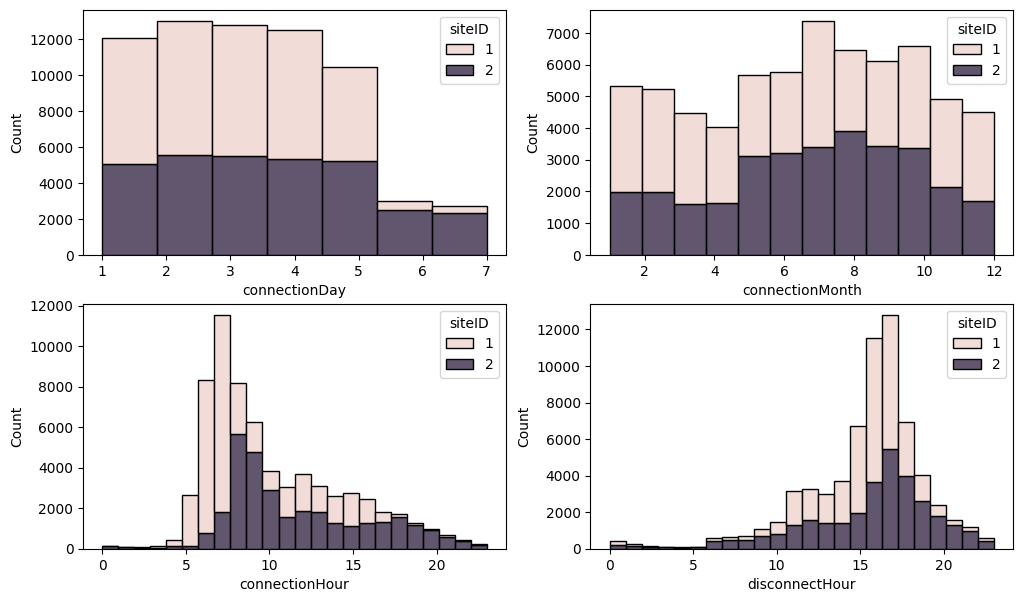

In [69]:
plt.rcParams["figure.figsize"] = [12.00, 7]

fig, axis = plt.subplots(2, 2)
sns.histplot(charg_set, x="connectionDay", hue="siteID", bins=7, ax=axis[0, 0], multiple="stack")
sns.histplot(charg_set, x="connectionMonth", hue="siteID", bins=12, ax=axis[0, 1], multiple="stack")
sns.histplot(charg_set, x="connectionHour", hue="siteID", bins=24, ax=axis[1, 0], multiple="stack")
sns.histplot(charg_set, x="disconnectHour", hue="siteID", bins=24, ax=axis[1, 1], multiple="stack")

There are several observations we can make from the data above:
- As expected, number of charges over the weekend is much smaller than the ones during the working days, since drivers are more likely to charge at home
    - Site `#1` has fewer connections over the weekend, which could mean it's private, and hence less visited over the weekend.
- Connections are most frequent around and during the summer period, May to October, with a significant drop (around 50%) during winter and spring
- Most connections for both sites appear during morning hours (6:00 - 10:00)
    - For site `#1`, majority of connections are made between 5:00 and 18:00, while the one for site `#2` are more evenly spread out
- Most disconnects for both sites appear during afternoon hours (15:00 - 19:00)
    - Similar observation as for the connections, further supporting the idea that site `#1` might be private

### Key Performance Indicators (KPIs)

KPI: prediction of peak charging demand --> smaller excess stand-by capacity & increased efficiency
depends on: temperature, day of week, season, holiday events

Plot the number of charging sessions per month & CW: registered and unregistered users
See the disctribution of sites during working hours or before/after --> when most sessions are done. Registered users = workers?
Having info from registered users can allow to distribute the charging to an optimal state (e.g. iPhone optimal battery loading)

### Site Characteristics

From the previous analysis we know our dataset contains data of two sites (denoted as `1` and `2`), that correspond to public and private sites - not necessarily in that order.

**Hypotheses:**
1. Private site is used only during a specific period (e.g. opening hours, working week days), while the public one will have usage throughout the whole day / week
2. Private site is used by registered users - they would probably need an identity proof to access the private site in the first place. Public site would be used by both
3. Private site will have better utilization, since it might better regulate the usage of its EV charging network

#### Private site is used only during specific period

If this hypothesis is correct, we would expect to see signficantly fewer charging events on one of the sites during weekend, as well as during non-working hours.
Depending on the restrictions placed on the private site, it could still be possible to see some events outside this period.

<Axes: xlabel='disconnectHour', ylabel='Count'>

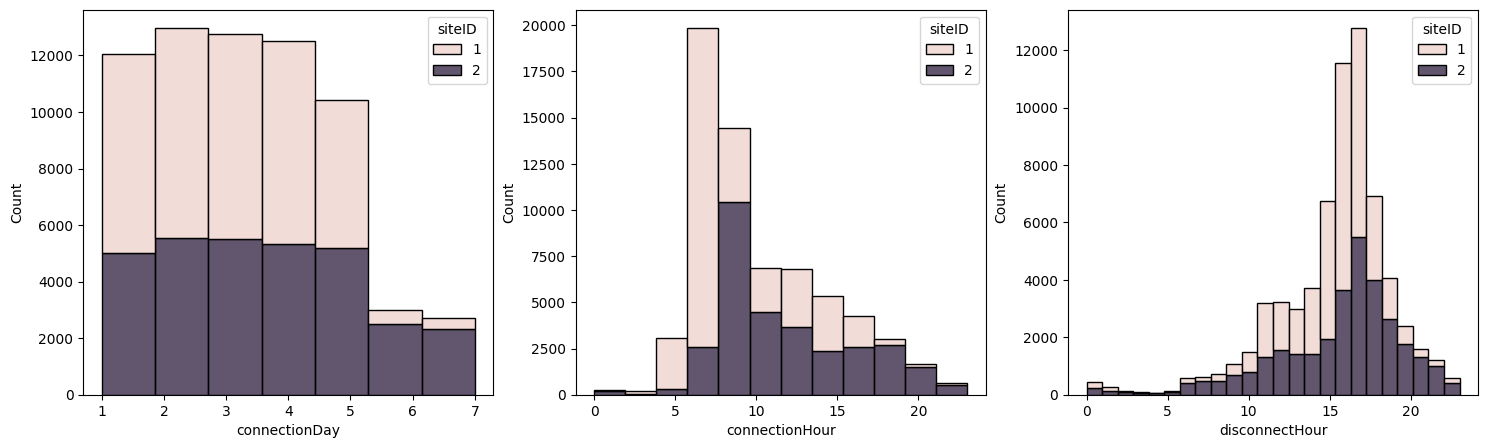

In [77]:
plt.rcParams["figure.figsize"] = [18, 5]

fig, axis = plt.subplots(1, 3)
sns.histplot(charg_set, x="connectionDay", hue="siteID", bins=7, ax=axis[0], multiple="stack")
sns.histplot(charg_set, x="connectionHour", hue="siteID", bins=12, ax=axis[1], multiple="stack")
sns.histplot(charg_set, x="disconnectHour", hue="siteID", bins=24, ax=axis[2], multiple="stack")

Histograms above seem to show that site `#1` is indeed a private one, since its usage is focused on working days of the week, and the connection and disconnect times don't show much activity outside of working hours.

#### Private site is used by registered users

Percentage of registered users > 90% => Site is private

In [91]:
charg_set.groupby('siteID')['userID'].apply(lambda x: x.notnull().sum() / len(x) * 100)

siteID
1    93.644769
2    52.126847
Name: userID, dtype: float64

Based on the above, site `#2` doesn't seem to be private.